In [59]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [60]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [61]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text
from sqlalchemy.ext.declarative import declarative_base



In [62]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [63]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [64]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [65]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station

In [66]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [82]:
# Find the most recent date in the data set.

most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date

print(f"{most_recent_date}")

2017-08-23


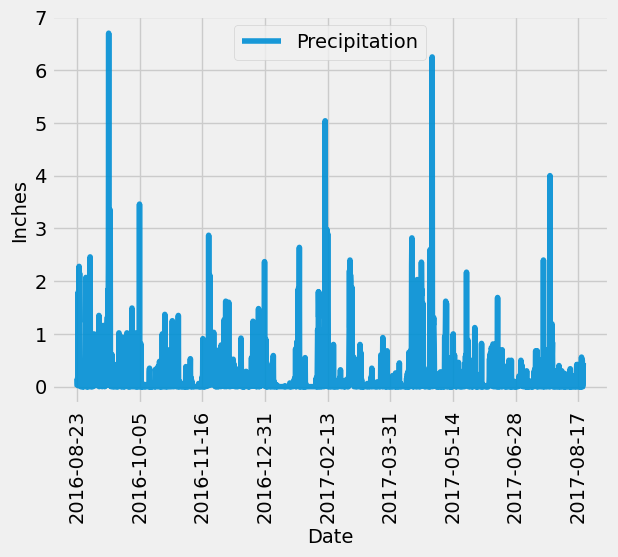

In [138]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database

# made a query for the last 12 months and ordered by descending order to start at most recent data point

last_year_date = session.query(measurement.date).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date.desc()).all()

#print(f"{last_year_data}")


# Calculate the date one year from the last date in data set.

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

#print(f"{year_ago}")


# Perform a query to retrieve the data and precipitation scores

last_year_data = session.query(measurement.date,measurement.prcp).\
    order_by(measurement.date.asc()).\
    filter(measurement.date >= year_ago).all()

#print(f"{last_year_data}")


# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Saved results into DF and set column name to Date and Precipitation

df_prcp = pd.DataFrame(last_year_data, columns=['Date','Precipitation'])


# Sort the dataframe by date

df_prcp.set_index('Date', inplace=True)
df_prcp.sort_values(by=['Date'])
df_prcp = df_prcp.dropna()


# Use Pandas Plotting with Matplotlib to plot the data

prcp = df_prcp.plot(alpha=0.9)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.xticks(rotation='vertical')
plt.show()

In [139]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_prcp.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [140]:
# Design a query to calculate the total number of stations in the dataset
stations_count = session.query(station).count()
print(f"There are {stations_count} stations in the dataset")

There are 9 stations in the dataset


In [141]:
station.classes.keys()

['measurement', 'station']

In [142]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

# Hint from Module to use func.count here

active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [149]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_station = active_stations[0][0]
most_active_station

most_active_temps = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == most_active_station).all()

most_active_temps

[(54.0, 85.0, 71.66378066378067)]

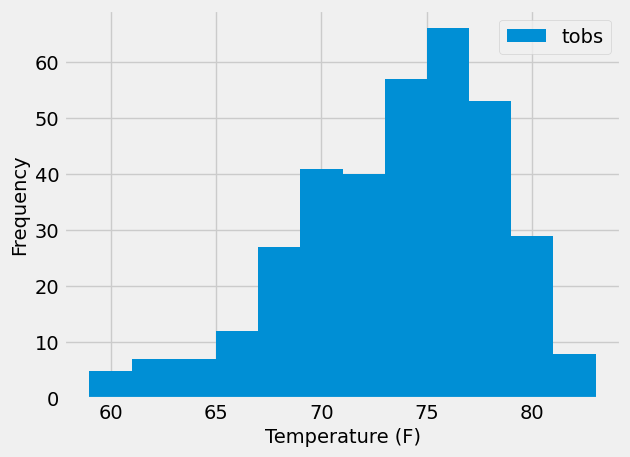

In [155]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_station_temps = session.query(measurement.tobs).\
    filter(measurement.station == most_active_station).\
    filter(measurement.date >= year_ago).all()

#Store query results as a DataFrame

df_active = pd.DataFrame(active_station_temps, columns=['tobs'])

#Plot DataFrame as Histogram

df_active.plot.hist(bins=12)
plt.xlabel("Temperature (F)")
plt.show()

# Close Session

In [156]:
# Close Session
session.close()